In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [54]:
raw_data_url = "https://gist.githubusercontent.com/cassiasamp/197b4e070f5f4da890ca4d226d088d1f/raw/38c9d4906ed121481b4dc201fa2004f2b3d0065f/penguins.csv"
df = pd.read_csv(raw_data_url)

In [55]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
df.shape

(344, 9)

In [5]:
df.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [6]:
df = df.dropna().drop("rowid", axis=1)

In [7]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [8]:
df["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [9]:
y = df["species"]
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]

In [10]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [11]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
rf.feature_importances_

array([0.41267633, 0.30107056, 0.28625311])

In [15]:
rf.feature_names_in_

array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
      dtype=object)

In [16]:
importances_df = pd.DataFrame({"feature_names" : rf.feature_names_in_, 
                             "importances" : rf.feature_importances_})

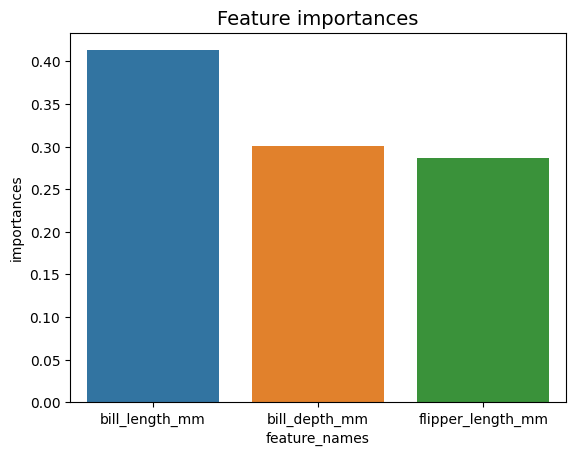

In [58]:
g = sns.barplot(x=importances_df["feature_names"], 
                y=importances_df["importances"])
g.set_title("Feature importances", fontsize=14);

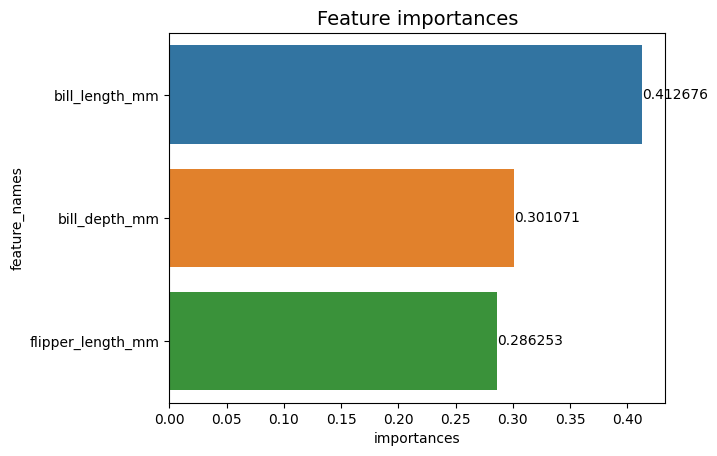

In [60]:
g = sns.barplot(data=importances_df, 
                x="importances", 
                y="feature_names")
g.set_title("Feature importances", fontsize=14)
for value in g.containers:
    g.bar_label(value)

In [61]:
# importances_df_sorted = importances_df.sort_values(by="importances", ascending=False)

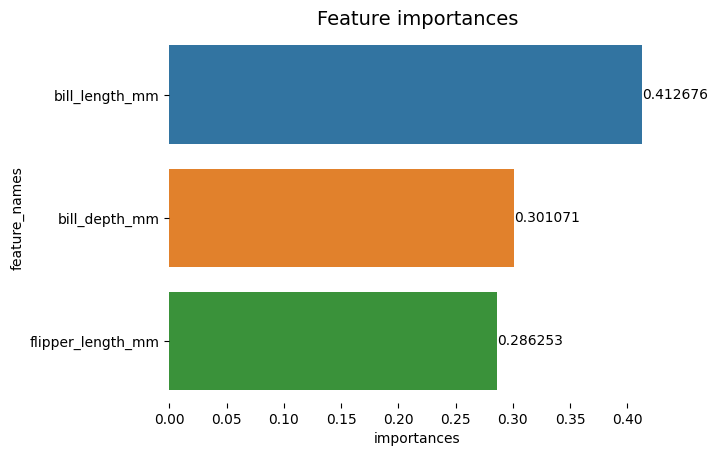

In [77]:
g = sns.barplot(data=importances_df, 
                x="importances", 
                y="feature_names")
sns.despine(bottom=True, left=True)
g.set_title("Feature importances", fontsize=14)
#g.set(xticks=[])
#g.set(xlabel=None)
#g.set(ylabel=None)
for value in g.containers:
    g.bar_label(value)

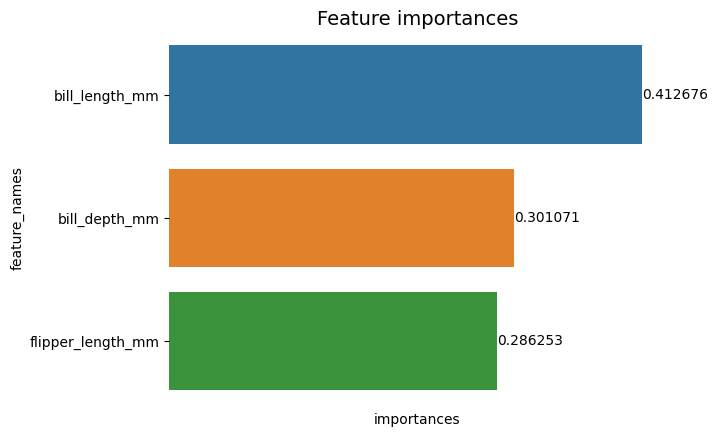

In [78]:
g = sns.barplot(data=importances_df, 
                x="importances", 
                y="feature_names")
sns.despine(bottom=True, left=True)
g.set_title("Feature importances", fontsize=14)
g.set(xticks=[])
#g.set(xlabel=None)
#g.set(ylabel=None)
for value in g.containers:
    g.bar_label(value)

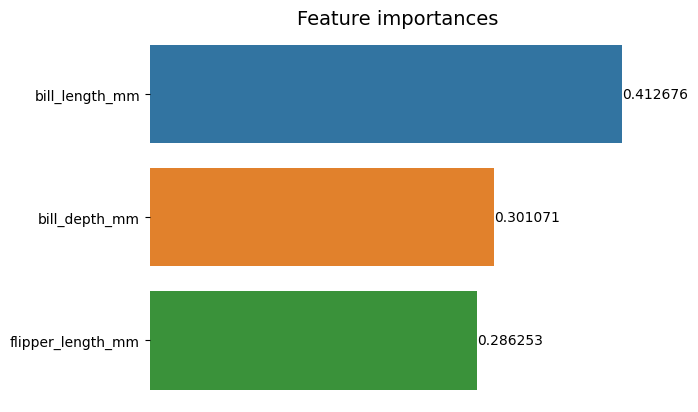

In [79]:
g = sns.barplot(data=importances_df, 
                x="importances", 
                y="feature_names")
sns.despine(bottom=True, left=True)
g.set_title("Feature importances", fontsize=14)
g.set(xticks=[])
g.set(xlabel=None)
g.set(ylabel=None)
for value in g.containers:
    g.bar_label(value)

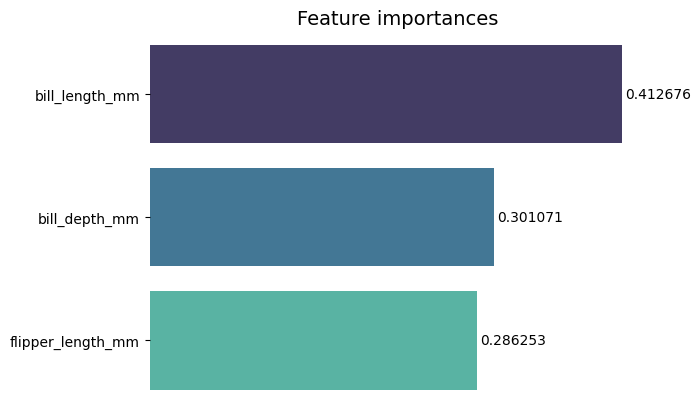

In [85]:
g = sns.barplot(data=importances_df, 
                x="importances", 
                y="feature_names",
                
                # adding mako palette
                palette="mako")
sns.despine(bottom=True, left=True)
g.set_title("Feature importances", fontsize=14)
g.set(xticks=[])
g.set(xlabel=None)
g.set(ylabel=None)
for value in g.containers:
    g.bar_label(value, 
                padding=2)

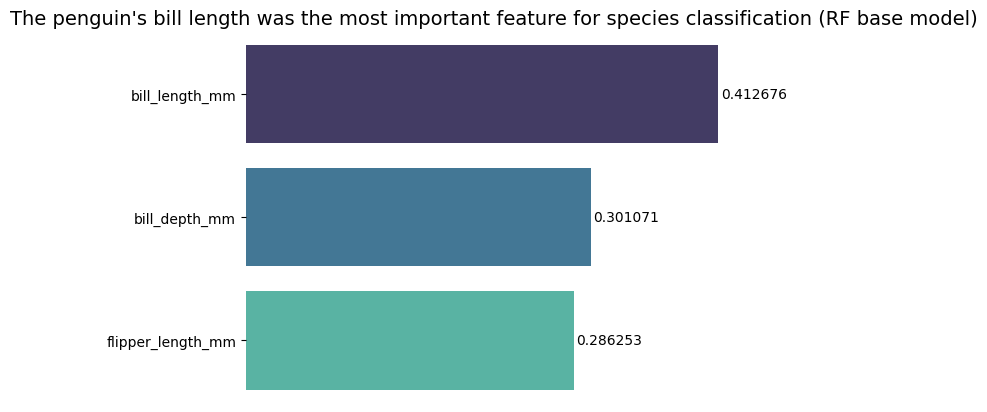

In [83]:
g = sns.barplot(data=importances_df, 
                x="importances", 
                y="feature_names", 
                palette="mako")
sns.despine(bottom=True, left=True)
g.set_title("The penguin's bill length was the most important feature for species classification (RF base model)", fontsize=14)
g.set(xticks=[])
g.set(xlabel=None)
g.set(ylabel=None)
for value in g.containers:
    g.bar_label(value, padding=2)